In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



sb.set()

data = pd.read_csv('cleaned_hotel_bookings.csv', dtype={'agent': str, 'company': str})

In [27]:
selected_categorical_cols = ['deposit_type', 'agent', 'market_segment']
encoded_categorical_df = pd.get_dummies(data[selected_categorical_cols], drop_first=True)
final_data_encoded = pd.concat([encoded_categorical_df, data[['lead_time', 'total_of_special_requests', 'is_canceled']]], axis = 1)

X = final_data_encoded.drop(columns='is_canceled')
y = final_data_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## XGBoost Classifier

XGBoost is a high-performance gradient boosting framework that builds an ensemble of weak learners (decision trees) and optimizes them using gradient descent.  
It is known for its speed, regularization capabilities, and strong performance on structured data.


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)

y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

<Axes: >

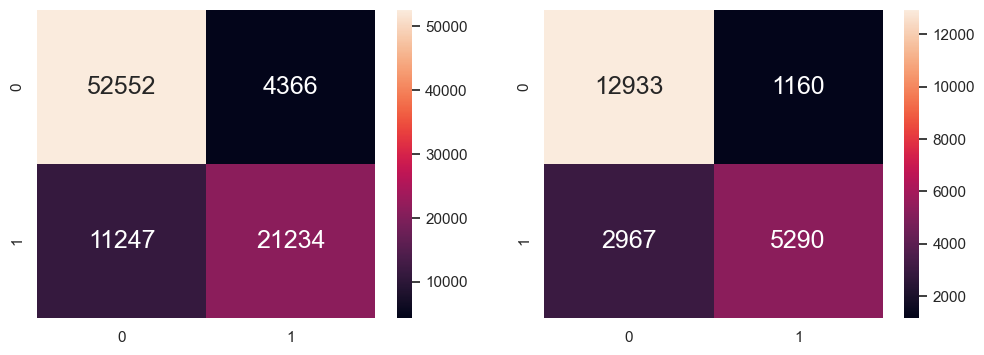

In [30]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred_xgb),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_xgb), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [31]:
xgb_accuracy = accuracy_score(y_test, y_test_pred_xgb)
xgb_report = classification_report(y_test, y_test_pred_xgb)
print(f"Accuracy Score of XGB Classifier : {xgb_accuracy}")
print(f"Classification Report: \n{xgb_report}")

Accuracy Score of XGB Classifier : 0.8153467561521253
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     14093
           1       0.82      0.64      0.72      8257

    accuracy                           0.82     22350
   macro avg       0.82      0.78      0.79     22350
weighted avg       0.82      0.82      0.81     22350



## Evaluation: XGBoost Classifier

The XGBoost classifier achieved the highest accuracy among the models, with an **accuracy score of 81.4%** on the test set.

### Key Observations:
- The model performs **very well for class `0` (not canceled)**, with a **precision of 0.81** and a **recall of 0.91**, indicating it is highly effective at correctly identifying non-canceled bookings.
- For class `1` (canceled), the **precision remains strong at 0.81**, but the **recall drops to 0.64**, meaning the model misses a portion of true cancellations.
- The **F1-score for class `1` is 0.72**, showing a good balance but room for improvement in recall.
- The **macro average F1-score is 0.79**, suggesting overall balanced performance across both classes.
- The **weighted average F1-score is 0.81**, aligning closely with the overall accuracy and reinforcing the model’s consistency.

### Summary:
The XGBoost model delivers the strongest overall performance among the models tested. It excels at identifying non-canceled bookings and maintains high precision for cancellations, though its recall for canceled bookings could be improved slightly. Its ability to capture complex feature interactions makes it a highly effective choice for this prediction task.
